#Final Project - Team4


## Context (Early Suicide Prevention from Reddit's Social Data)


We have a dataset of posts from subreddit r/SuicideWatch and r/Depression. Throughout the project we have analyzed characteristics of triggering keywords using word frequency, correlation strength and visualizations. In addition to that, we have built a prediction model using logistic regression to detect suicidal ideation from the posts. 

---



## Data Science Questions



Q1. What is the relationship between certain triggering keywords and suicidal attitudes? (exploratory question)

Q2. How can we automatically detect if a post is suicidal so that we can take preventative measures?
(predictive question)







## Data Collection

We have altogether 232074 posts from the subreddit r/SuicideWatch and r/Depression. Half of the posts (116037) are labeled suicidal while the other halves are labeled non-suicidal.

---


[DataSet](https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
import seaborn as sns


##Loading and Examining Dataset

In [2]:
df = pd.read_csv("./Suicide_Detection.csv")

In [3]:
df.shape

(232074, 3)

In [4]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


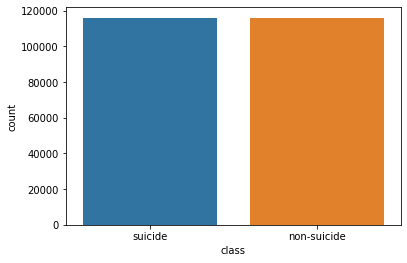

In [5]:
sns.countplot(df['class'])

In [6]:
posts=df['text']
all_posts = " ".join(w for w in posts)

In [7]:
from wordcloud import WordCloud

In [8]:
wordcloud = WordCloud(background_color='black', width=1600,                            
                      height=800, max_words=400).generate(all_posts)

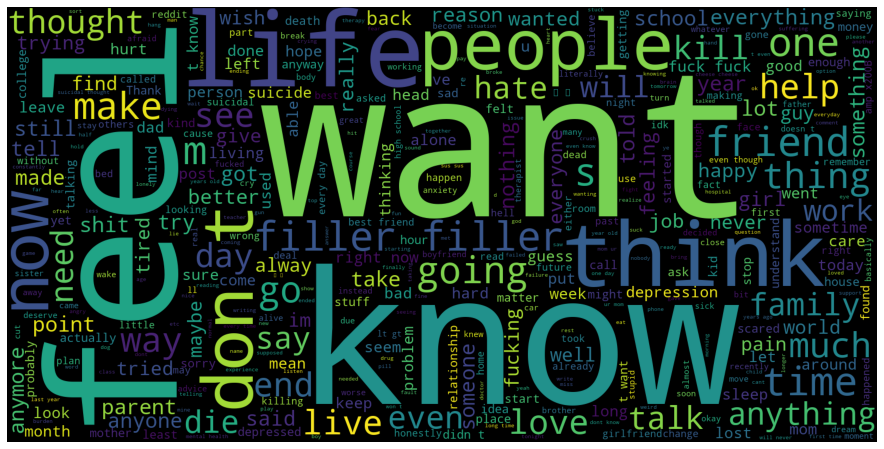

In [9]:
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud) 

## Text Pre Processing & Cleaning

In [10]:
df= df.drop('Unnamed: 0', axis =1)


In [11]:
df['Length'] = df['text'].apply(lambda x: len(x.split(' ')))
df['Length'].describe()

count    232074.000000
mean        131.546438
std         222.081581
min           1.000000
25%          26.000000
50%          60.000000
75%         154.000000
max       15632.000000
Name: Length, dtype: float64

In [12]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  print(df['Length'].quantile(i))

15.0
22.0
30.0
42.0
60.0
86.0
126.0
190.0
317.0


In [13]:
##cutting of the post length at 317 words
df= df[df.Length<=317]

In [14]:
len(df)

208955

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


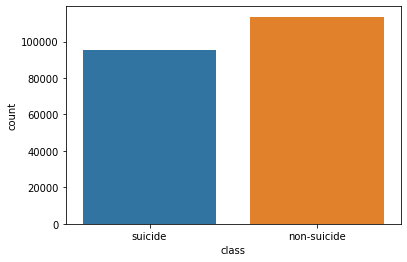

In [15]:
sns.countplot(df['class'])

 Now, We can get a good distribution of the target class

In [16]:
#converting to lowercase
df['text'] = [t.lower() for t in df['text']]


In [17]:
df['text'][:2]

0    ex wife threatening suiciderecently i left my ...
1    am i weird i don't get affected by compliments...
Name: text, dtype: object

In [18]:
#removing all non-alphanumeric characters
df['text'] = [re.sub(r'[^\w]', ' ',t) for t in df['text']]
df['text'][:2]

0    ex wife threatening suiciderecently i left my ...
1    am i weird i don t get affected by compliments...
Name: text, dtype: object

In [19]:
df['text'] = [re.sub(r'[0-9]+', '',t) for t in df['text']]
df['text'][:2]

0    ex wife threatening suiciderecently i left my ...
1    am i weird i don t get affected by compliments...
Name: text, dtype: object

In [20]:
#tokenization
Words = [t.split() for t in df['text']]
Words[:2]

[['ex',
  'wife',
  'threatening',
  'suiciderecently',
  'i',
  'left',
  'my',
  'wife',
  'for',
  'good',
  'because',
  'she',
  'has',
  'cheated',
  'on',
  'me',
  'twice',
  'and',
  'lied',
  'to',
  'me',
  'so',
  'much',
  'that',
  'i',
  'have',
  'decided',
  'to',
  'refuse',
  'to',
  'go',
  'back',
  'to',
  'her',
  'as',
  'of',
  'a',
  'few',
  'days',
  'ago',
  'she',
  'began',
  'threatening',
  'suicide',
  'i',
  'have',
  'tirelessly',
  'spent',
  'these',
  'paat',
  'few',
  'days',
  'talking',
  'her',
  'out',
  'of',
  'it',
  'and',
  'she',
  'keeps',
  'hesitating',
  'because',
  'she',
  'wants',
  'to',
  'believe',
  'i',
  'll',
  'come',
  'back',
  'i',
  'know',
  'a',
  'lot',
  'of',
  'people',
  'will',
  'threaten',
  'this',
  'in',
  'order',
  'to',
  'get',
  'their',
  'way',
  'but',
  'what',
  'happens',
  'if',
  'she',
  'really',
  'does',
  'what',
  'do',
  'i',
  'do',
  'and',
  'how',
  'am',
  'i',
  'supposed',
  '

In [21]:
#removing stop-words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
to_add = set()
for token in stops:
  if "'" in token:
    to_add.add(token.replace("'",''))
stops = stops.union(to_add)
len(stops)

204

In [23]:
# removing all stopwords
def remove_stopwords(tokens):
 rt = []
 for token in tokens:
  if token not in stops:
    rt.append(token)
 return rt
Words = [remove_stopwords(w) for w in Words]
Words[:2]

[['ex',
  'wife',
  'threatening',
  'suiciderecently',
  'left',
  'wife',
  'good',
  'cheated',
  'twice',
  'lied',
  'much',
  'decided',
  'refuse',
  'go',
  'back',
  'days',
  'ago',
  'began',
  'threatening',
  'suicide',
  'tirelessly',
  'spent',
  'paat',
  'days',
  'talking',
  'keeps',
  'hesitating',
  'wants',
  'believe',
  'come',
  'back',
  'know',
  'lot',
  'people',
  'threaten',
  'order',
  'get',
  'way',
  'happens',
  'really',
  'supposed',
  'handle',
  'death',
  'hands',
  'still',
  'love',
  'wife',
  'cannot',
  'deal',
  'getting',
  'cheated',
  'constantly',
  'feeling',
  'insecure',
  'worried',
  'today',
  'may',
  'day',
  'hope',
  'much',
  'happen'],
 ['weird',
  'get',
  'affected',
  'compliments',
  'coming',
  'someone',
  'know',
  'irl',
  'feel',
  'really',
  'good',
  'internet',
  'strangers']]

In [24]:
#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [25]:
lemmatizer= WordNetLemmatizer()


In [26]:
def lemmatize(tokens):
  rt = []
  for token in tokens:
    rt.append(lemmatizer.lemmatize(token))
  return rt
Words = [lemmatize(w) for w in Words]
Words[:2]

[['ex',
  'wife',
  'threatening',
  'suiciderecently',
  'left',
  'wife',
  'good',
  'cheated',
  'twice',
  'lied',
  'much',
  'decided',
  'refuse',
  'go',
  'back',
  'day',
  'ago',
  'began',
  'threatening',
  'suicide',
  'tirelessly',
  'spent',
  'paat',
  'day',
  'talking',
  'keep',
  'hesitating',
  'want',
  'believe',
  'come',
  'back',
  'know',
  'lot',
  'people',
  'threaten',
  'order',
  'get',
  'way',
  'happens',
  'really',
  'supposed',
  'handle',
  'death',
  'hand',
  'still',
  'love',
  'wife',
  'cannot',
  'deal',
  'getting',
  'cheated',
  'constantly',
  'feeling',
  'insecure',
  'worried',
  'today',
  'may',
  'day',
  'hope',
  'much',
  'happen'],
 ['weird',
  'get',
  'affected',
  'compliment',
  'coming',
  'someone',
  'know',
  'irl',
  'feel',
  'really',
  'good',
  'internet',
  'stranger']]

In [27]:
a = []
for i in Words:
  for j in i:
   a.append(j)


In [28]:
all_texts = " ".join(w for w in a)

In [29]:
wordcloud = WordCloud(background_color='black', width=1600,                            
                      height=800, max_words=400).generate(all_texts)

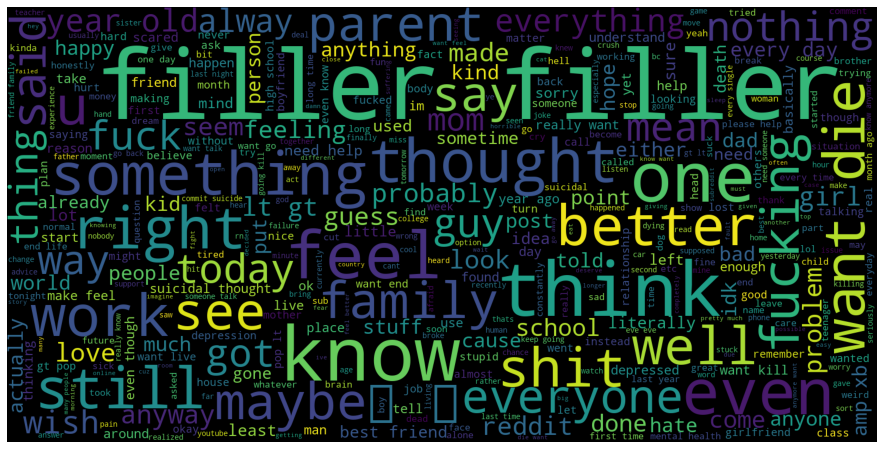

In [30]:
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)  

## Q1- Exploratory Question

### Data Preparation

In [31]:
len(Words)

208955

In [32]:
words = list()
for i in Words:
  for j in i:
        words.append(j)
len(words)

7756858

In [33]:
from collections import Counter

In [34]:
#Calculating word frequency
Words_Freq = Counter(words)
Words_Freq = pd.DataFrame({'Word': list(Words_Freq.keys()), 'Frequency': list(Words_Freq.values())})
Words_Freq.sort_values('Frequency', ascending = False, inplace= True)
Words_Freq.head(70)


,Word,Frequency
82,like,110987
24,want,100795
27,know,80380
59,feel,79982
139,life,71439
...,...,...
195,work,18662
22,keep,18623
420,fuck,18426
66,bad,18198


In [35]:
len(Words_Freq)

119296

In [36]:
Words_Freq.describe()

,Frequency
count,119296.000000
mean,65.021945
std,1042.129566
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,110987.000000


In [37]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Words_Freq['Frequency'].quantile(i))

1047.0
1235.6399999999994
1470.6749999999884
1777.2300000000105
2222.0
2853.759999999864
3889.1150000000052
5618.780000000203
12020.055000001157


In [38]:
#Cutting off the words frequency at above 99 quantile and below 29770
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.995)]
len(Words_Freq)

596

In [39]:
Words_Freq['Frequency'].describe()

count       596.000000
mean       8862.117450
std       11704.726712
min        2230.000000
25%        3037.250000
50%        4680.500000
75%        9379.000000
max      110987.000000
Name: Frequency, dtype: float64

In [40]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] < 29770]
len(Words_Freq)

571

In [41]:
Words_Freq.head()

,Word,Frequency
73,need,29570
70,fucking,29449
57,someone,28779
229,anymore,28735
439,thought,27557


In [42]:
#reducing number of words for processing capactiy
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Words_Freq['Frequency'].quantile(i))

27294.04
27438.279999999988
27568.779999999988
28240.24000000005
28741.6
28766.68
28973.299999999974
29355.200000000008
29501.030000000006


In [43]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] >= 4615.8130000000237]
Words_Freq.tail()


,Word,Frequency
204,moment,4689
836,came,4687
721,lonely,4685
1310,face,4676
889,suck,4662


In [44]:
Words_Freq

,Word,Frequency
73,need,29570
70,fucking,29449
57,someone,28779
229,anymore,28735
439,thought,27557
...,...,...
204,moment,4689
836,came,4687
721,lonely,4685
1310,face,4676


In [45]:
len(Words_Freq)

275

In [46]:
# converting all words to uppercase
Words_Freq.Word = [w.upper() for w in Words_Freq.Word]
Words_Freq

,Word,Frequency
73,NEED,29570
70,FUCKING,29449
57,SOMEONE,28779
229,ANYMORE,28735
439,THOUGHT,27557
...,...,...
204,MOMENT,4689
836,CAME,4687
721,LONELY,4685
1310,FACE,4676


In [47]:
all_words= " ".join(w for w in Words_Freq.Word)

In [48]:
wordcloud = WordCloud(background_color='black', width=1600,                            
                      height=800, max_words=400).generate(all_words)

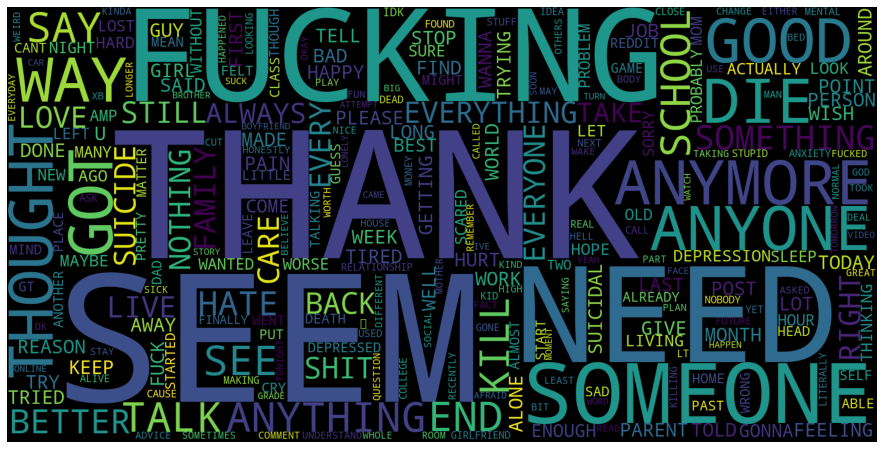

In [49]:
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)  

In [50]:
#converting all texts in dataset to uppercase
df['text'] = [t.upper() for t in df['text']]
df

,text,class,Length
0,EX WIFE THREATENING SUICIDERECENTLY I LEFT MY ...,suicide,143
1,AM I WEIRD I DON T GET AFFECTED BY COMPLIMENTS...,non-suicide,27
2,FINALLY IS ALMOST OVER SO I CAN NEVER HEAR...,non-suicide,26
3,I NEED HELPJUST HELP ME IM CRYING SO HARD,suicide,9
5,HONETLY IDKI DONT KNOW WHAT IM EVEN DOING HERE...,suicide,289
...,...,...,...
232068,I DID SOMETHING TODAY I WENT SLEDDING WITH MY ...,non-suicide,38
232069,IF YOU DON T LIKE ROCK THEN YOUR NOT GOING TO ...,non-suicide,19
232070,YOU HOW YOU CAN TELL I HAVE SO MANY FRIENDS AN...,non-suicide,31
232071,PEE PROBABLY TASTES LIKE SALTY TEA CAN SOM...,non-suicide,14


In [51]:
#Adding columns as words to the dataset and dropping the "text" column
Final_Words = list(Words_Freq.Word)
for i in Final_Words:
    df[i] = df['text'].apply(lambda x: 1 if i in str(x).split(' ') else 0)
df.drop('text',axis=1,inplace=True)
df.head()

<ipython-input-51-c6d2cee722dd>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = df['text'].apply(lambda x: 1 if i in str(x).split(' ') else 0)


,class,Length,NEED,FUCKING,SOMEONE,ANYMORE,THOUGHT,GOOD,DIE,WAY,...,IVE,STORY,ATTEMPT,YEAH,AFRAID,MOMENT,CAME,LONELY,FACE,SUCK
0,suicide,143,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-suicide,27,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,non-suicide,26,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,suicide,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,suicide,289,0,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [52]:
#setting class to 1 if suicide and 0 if non-suicide
df['class'] = df['class'].apply(lambda x: 1 if x=='suicide' else 0)
df.head()

,class,Length,NEED,FUCKING,SOMEONE,ANYMORE,THOUGHT,GOOD,DIE,WAY,...,IVE,STORY,ATTEMPT,YEAH,AFRAID,MOMENT,CAME,LONELY,FACE,SUCK
0,1,143,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,27,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,289,0,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0


###Exploratory Data Analysis

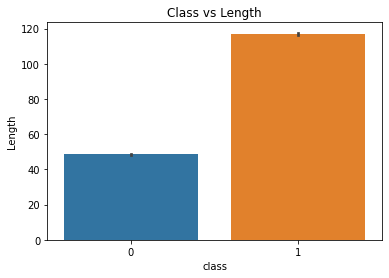

In [53]:
sns.barplot(x='class',y='Length',data=df)
plt.title('Class vs Length')
plt.show()

Checking the words with the highest 
correlation to suicide class

In [54]:
from scipy.stats import pearsonr


In [55]:
Correlations = dict()
var = list(df.columns)
var.remove('class')
for i in var:
    Correlations[i] = pearsonr(df[i],df['class'])[0]
Correlations = pd.DataFrame({'Feature':list(Correlations.keys()),'Correlation':list(Correlations.values())})
Correlations.sort_values('Correlation',ascending=False,inplace=True)
Correlations.set_index('Feature')
Correlations.head(10)


,Feature,Correlation
0,Length,0.458362
24,SUICIDE,0.311465
14,KILL,0.308990
4,ANYMORE,0.308548
7,DIE,0.303004
13,END,0.276018
28,FAMILY,0.255691
26,LIVE,0.255383
75,SUICIDAL,0.244477
22,EVERYTHING,0.238520


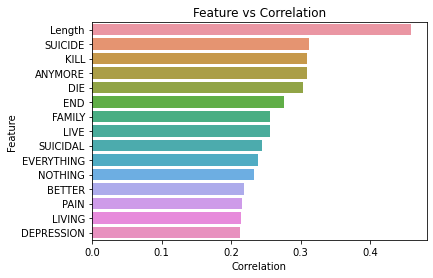

In [56]:
temp = Correlations.head(15)
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

As we can see the correlations are not high considering the non linear relationship between the variables.

In [57]:
Correlations.tail(15)


,Feature,Correlation
260,VIDEO,-0.031261
251,WEIRD,-0.031448
124,REDDIT,-0.035068
177,LT,-0.037522
155,GT,-0.039825
269,YEAH,-0.042081
143,CLASS,-0.048035
46,GIRL,-0.048689
154,GAME,-0.049532
208,R,-0.050860


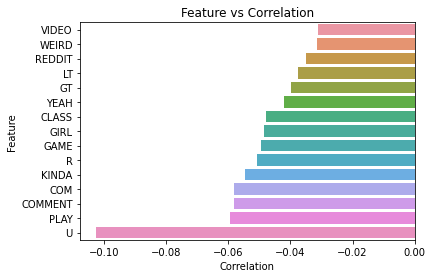

In [58]:
## Negatively correlated
temp = Correlations.tail(15)
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

## Q2- Predictive Question (Using Classification Model)

In [59]:
#dropping "Length" column since we don't need it anymore
df_pred = df.drop('Length', axis =1)

In [60]:
len(df_pred)

208955

In [61]:
df_pred.head()

,class,NEED,FUCKING,SOMEONE,ANYMORE,THOUGHT,GOOD,DIE,WAY,ANYONE,...,IVE,STORY,ATTEMPT,YEAH,AFRAID,MOMENT,CAME,LONELY,FACE,SUCK
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


### Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X= df_pred.drop('class', axis =1) #all columns except "class"
y = df_pred['class']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=17,
                                                    stratify=df['class'])

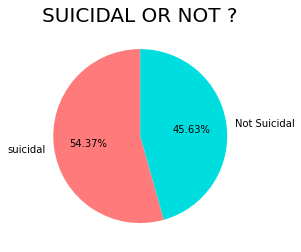

In [65]:
plt.pie(y_train.value_counts(),startangle=90,colors=['#ff7b7b', '#00dddf'],
        autopct='%0.2f%%',labels=['suicidal','Not Suicidal'])
plt.title('SUICIDAL OR NOT ?',fontdict={'size':20})
plt.show()

### Feature Extraction - Bag of Words


In [69]:
len(X_train)

167164

In [70]:
X_train

,NEED,FUCKING,SOMEONE,ANYMORE,THOUGHT,GOOD,DIE,WAY,ANYONE,GOT,...,IVE,STORY,ATTEMPT,YEAH,AFRAID,MOMENT,CAME,LONELY,FACE,SUCK
48282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223739,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50081,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
122195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39315,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
95880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25344,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
93610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Since, our X_train is already an array of the word frequency we dont need to vectorize it to fit it in the model**

### Logistic Regression

In [71]:
from sklearn.metrics import classification_report, confusion_matrix


In [72]:
def run_train_predict(clf):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(classification_report(y_test, preds))

In [73]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
run_train_predict(clf)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22721
           1       0.91      0.83      0.87     19070

    accuracy                           0.88     41791
   macro avg       0.89      0.88      0.88     41791
weighted avg       0.89      0.88      0.88     41791



In [74]:
clf.score(X_train, y_train)

0.8830429996889282

In [75]:
clf.score(X_test, y_test)

0.8849273767079037

In [76]:
y_pred = clf.predict(X_test)

In [77]:
cm =confusion_matrix(y_test, y_pred)
cm


array([[21200,  1521],
       [ 3288, 15782]])

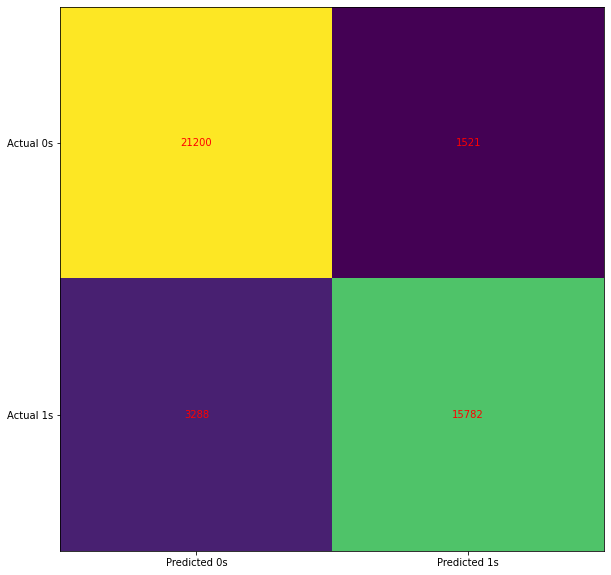

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
fig.tight_layout
plt.show()



In [80]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
fig = px.scatter(
    x=fpr, y=tpr, color = thresholds,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate', color = 'Threshold'))
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()